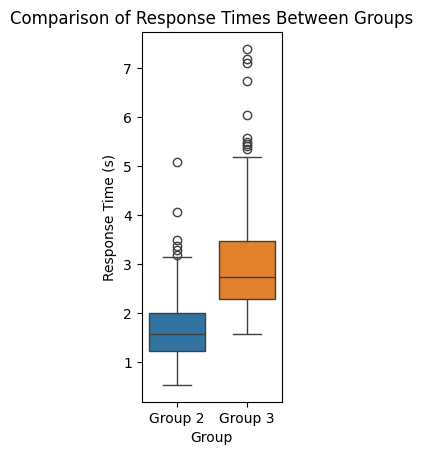

In [7]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Assuming your CSV files are named in a way that allows you to loop through them
# Replace 'path/to/data/{}{}.csv' with the actual path and naming convention of your CSV files
num_participants = 10
num_trials = 20

# Read and concatenate data for Group 0
group2_data = pd.concat([pd.read_csv('../group2/{}{}.csv'.format(2, i+1)).assign(Participant=i+1) for i in range(num_participants)], axis=0)

# Read and concatenate data for Group 1
group3_data = pd.concat([pd.read_csv('../group3/{}{}.csv'.format(3, i+1)).assign(Participant=i+1) for i in range(num_participants)], axis=0)

# Make the 'Trial' column 1-indexed
group2_data['Trial'] = group2_data['Trial'] + 1
group3_data['Trial'] = group3_data['Trial'] + 1



# Visualization using box plots
combined_data = pd.concat([group2_data['Response Time (s)'], group3_data['Response Time (s)']], axis=1)
combined_data.columns = ['Group 2', 'Group 3']

sns.boxplot(data=combined_data)
plt.title('Comparison of Response Times Between Groups')
plt.xlabel('Group')
plt.ylabel('Response Time (s)')
# Adjust the aspect ratio to elongate the plot
plt.gca().set_aspect(0.7)
plt.show()



In [8]:
# Detect and print outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Identify outliers for each group
group2_outliers = detect_outliers(group2_data['Response Time (s)'])
group3_outliers = detect_outliers(group3_data['Response Time (s)'])



# Create DataFrames with custom index names
group2_outliers_df = pd.DataFrame({'Trial': group2_outliers.index + 1, 'Response Time (s)': group2_outliers.values})
group3_outliers_df = pd.DataFrame({'Trial': group3_outliers.index + 1, 'Response Time (s)': group3_outliers.values})

# Print outliers with custom index names
print("Outliers in Group 2:")
print(group2_outliers_df)

print("\nOutliers in Group 3:")
print(group3_outliers_df)



Outliers in Group 2:
   Trial  Response Time (s)
0      1           3.381064
1     14           4.073353
2     15           3.184670
3      1           5.089435
4     17           3.288924
5     11           3.503917

Outliers in Group 3:
   Trial  Response Time (s)
0      1           5.455322
1      2           7.191135
2      4           5.501670
3      9           5.415974
4      4           7.102901
5      5           5.570084
6     10           6.049648
7     17           6.748521
8      1           7.394775
9     11           5.346157


In [9]:
# Remove outliers from the original datasets
group2_no_outliers = group2_data[~group2_data['Response Time (s)'].isin(group2_outliers.values)]
group3_no_outliers = group3_data[~group3_data['Response Time (s)'].isin(group3_outliers.values)]
# Descriptive statistics for each group
group2_stats = group2_no_outliers['Response Time (s)'].describe()
group3_stats = group3_no_outliers['Response Time (s)'].describe()

# Print results
print(f"Descriptive Statistics for Group 2 (after removing outliers):\n{group2_stats}")
print(f"\nDescriptive Statistics for Group 3 (after removing outliers):\n{group3_stats}")


Descriptive Statistics for Group 2 (after removing outliers):
count    194.000000
mean       1.600882
std        0.559824
min        0.540870
25%        1.229885
50%        1.557344
75%        1.934322
max        3.144823
Name: Response Time (s), dtype: float64

Descriptive Statistics for Group 3 (after removing outliers):
count    190.000000
mean       2.848920
std        0.763876
min        1.585678
25%        2.290908
50%        2.668285
75%        3.173975
max        5.191840
Name: Response Time (s), dtype: float64


In [11]:
import pandas as pd
from scipy import stats

group2_times = group2_no_outliers['Response Time (s)']
group3_times = group3_no_outliers['Response Time (s)']

# Shapiro-Wilk test for normality

shapiro_group2 = stats.shapiro(group2_times)
shapiro_group3 = stats.shapiro(group3_times)

# Levene's test for homogeneity of variances
levene_test = stats.levene(group2_times, group3_times)

# Print the results
print("Shapiro-Wilk test for normality:")
print(f"Group 2: p-value = {shapiro_group2.pvalue:.4f}")
print(f"Group 3: p-value = {shapiro_group3.pvalue:.4f}")
print("\nLevene's test for homogeneity of variances:")
print(f"Levene's test p-value = {levene_test.pvalue:.4f}")

Shapiro-Wilk test for normality:
Group 2: p-value = 0.0141
Group 3: p-value = 0.0000

Levene's test for homogeneity of variances:
Levene's test p-value = 0.0015


In [12]:

from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(group2_times, group3_times)
print(f"Mann-Whitney U Test:")
print(f"U-statistic = {statistic:.4f}")
print(f"P-value = {p_value}")



Mann-Whitney U Test:
U-statistic = 2946.0000
P-value = 5.316028456867163e-46


/tmp/ipykernel_31031/3846423495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2_no_outliers['Group'] = 'Group 2 (No Outliers)'
/tmp/ipykernel_31031/3846423495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group3_no_outliers['Group'] = 'Group 3 (No Outliers)'


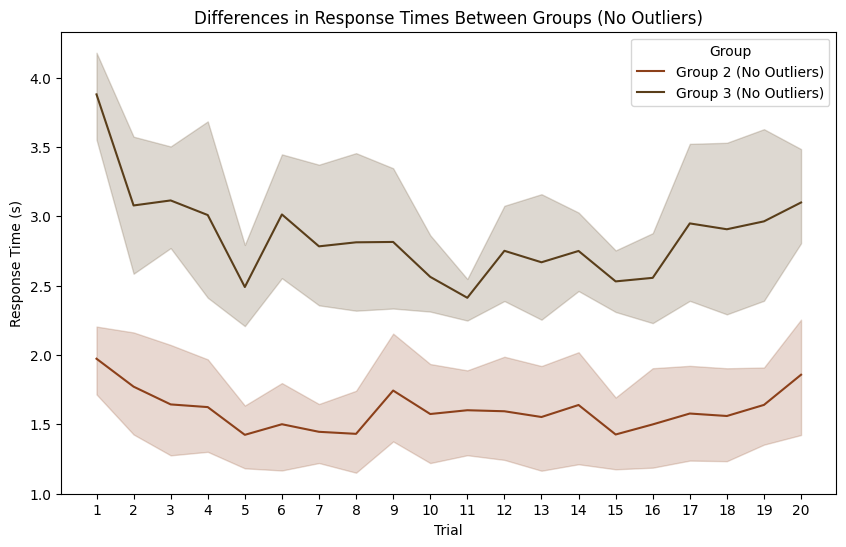

In [ ]:

# Add a 'Group' column to indicate the group
group2_no_outliers['Group'] = 'Group 2 (No Outliers)'
group3_no_outliers['Group'] = 'Group 3 (No Outliers)'

# Combine the datasets for easy plotting
combined_data = pd.concat([group2_no_outliers, group3_no_outliers])
# Subtract 1 from the "Trial" column to make it 1-indexed
combined_data['Trial'] = combined_data['Trial'] - 1
# Plot the line plot
plt.figure(figsize=(10, 6))
# Define a custom color palette in hex values
custom_palette = ["#8C401A", "#593E1A"]

# Set the custom palette
sns.set_palette(custom_palette)
sns.lineplot(x='Trial', y='Response Time (s)', hue='Group', data=combined_data)

plt.title('Differences in Response Times Between Groups (No Outliers)')
plt.xlabel('Trial')
plt.ylabel('Response Time (s)')
plt.legend(title='Group')

# Set x-axis ticks at intervals of 1
plt.xticks(range(1, combined_data['Trial'].max() + 1))
plt.show()
